# Starbucks Customers Segmentation

## 1. Business Understanding

Starbucks Corporation is an American coffee company. Today, it operates more than 30,000 retail stores in 80 markets around the world.The company hence is a big player in a vigorously competitive industry. One approach to retain customers is its Starbucks Reward Program. Members of the program receive promotional offers. The company then hopes to use the data collected on its customer behavior to create business value and make data-driven decisions on how it engages with its customers base.

## 2. Problem Statement
The company currently promotes products to customers with no prior knowledge of their segments. It is possible hence to analyse the data to find patterns in customer behaviors. This helps the company in aiming and tailoring its marketing efforts and resources to consumers who exhibit similar characteristics and are considered most likely to opt in for business's offerings. This form of target marketing is important because it helps the company by maximizing revenue while maintaining promotional campaigns cost smartly low. To do this, an unsupervised learning technique will be used to cluster customers into groups that can be be investigated separately to better understand their qualities and engage them accordingly.

## 3. Measurement Criterias

### Business Metrics
1. Distinguish the difference between how customers behave during non-promotional periods and how they behave when they are prompted to do so during promotionals periods. To measure this, Recency-Frequency-Monetary Analysis) for examining customer value is used. In this model, recency, frequency and monetary values are assigned a score from one to five based on quantiles partition dividing range of values into equal-sized intervals. The RFM score is then obtained by taking the average of all three scores.<br>
<br>RFM score <- RFM analysis is a data driven customer behavior segmentation technique. RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall. <br>
<br> Five is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers. Remember, RFM values and RFM scores are different. Value is the actual value of R/F/M for that customer, while Score is a number from 1-5 based on the value.

$$\textrm{RFM}_{score}={\textrm{recency}_{score}+\textrm{frequency}_{score}+\textrm{monetary}_{score}\over3}$$
2. Identify which customers react preferably to which types of offers. To measure this, offer view and completion rates will be used where the cardinalities of corresponding sets are divided by cardinalities of relevant sets.

$$\textrm{view rate}={n(\textrm{offer viewed})\over{n(\textrm{offer received})}}\;\;\;\;\;\;\;\;\textrm{completion rate}={n(\textrm{offer completed})\over{n(\textrm{offer viewed})}}$$

Note:-<br> Recency - The freshness of customer activity, be it  purchases or visits.<br>
       Frequency - The frequency of the customer transactions or visits.<br>
       Monetary - The intention of customer  to spend or purchasing power of customer.

###  Technical Metrics
For the algorithm chosen in this problem, K-Means, two appropriate methods will be used find the optimal number of clusters $k$ and to assess the model implementations; silhouette coefficient (SC) analysis and within-cluster Sum of Squared Errors (SSE) analysis.

1. Silhouette Coefficient (SC) analysis is a way to measure how close each point in a cluster is to the points in its neighboring clusters. Its a neat way to find out the optimum value for k during k-means clustering. Silhouette values lies in the range of [-1, 1]. A value of +1 indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned. Similarly, value of -1 indicates that the point is close to its neighboring cluster than to the cluster its assigned. And, a value of 0 means at the boundary of the distance between the two cluster. Value of +1 is ideal and -1 is least preferred. Hence, higher the value better is the cluster configuration.

Mathematically, for one data point $i$ where $a(i)$ represents the calculated mean distance of point $i$ with regard to to all other points in the cluster it was assigned and $b(i)$ represents the calculated mean distance of point $i$ with regard to to all points in its closest neighboring cluster, silhouette is defined:

$$s(i)={b(i)-a(i)\over\textrm{max}\{b(i),a(i))\}}$$
Therefore, it is clear from the above equation that$$-1\leq{s(i)}\leq1$$

Then, for one value representing the silhouette score that used for assessment of clustering outcomes, where $\bar{s}(k)$ represents the mean $s(i)$ over all data of the entire dataset for a specific number of clusters $k$, silhouette coefficient is defined:

$$SC=\textrm{max}_k\{\bar{s}(k)\}$$
2. Sum of Squared Errors (SSE) analysis is a way to measure variability (dispersion) within a cluster by taking the sum of the squared differences between each data point and its cluster's mean, and therefore defined where $x_i$ is the $i$th data point and $n$ is the total number of data points: [3]

$$SSE=\sum_{i=1}^{n}x_i^2-{1\over{n}}\Bigg(\sum_{i=1}^{n}x_i^2\Bigg)^2$$
SSE tends to decrease toward 0 as $k$-value increase because then each data point is its own cluster and there is no error between it and the mean of its cluster. The elbow method is then applied by plotting SSE for a range of $k$-values where where one should choose a $k$-value after which variability starts to have diminishing returns.



## 4. Dataset Description
The data is contained in three json files:

<b>portfolio.json</b> - containing offer ids and meta data about each offer (duration, type, etc.)<br>
<b>profile.json</b> - demographic data for each customer<br>
<b>transcript.json</b> - records for transactions, offers received, offers viewed, and offers completed<br>

schema and explanation of each variable in the files:

### portfolio.json

<b>id (string)</b> - offer id<br>
<b>offer_type (string)</b></b></b> - type of offer ie BOGO, discount, informational<br>
<b>difficulty (int) </b></b>- minimum required spend to complete an offer<br>
<b>reward (int)</b> - reward given for completing an offer<br>
<b>duration (int)</b> - time for offer to be open, in days<br>
<b>channels (list of strings)</b><br><br>
### profile.json

<b>age (int)</b> - age of the customer<br>
<b>became_member_on (int)</b> - date when customer created an app account<br>
<b>gender (str)</b> - gender of the customer (note some entries contain 'O' for other rather than M or F)<br>
<b>id (str)</b> - customer id<br>
<b>income (float)</b> - customer's income<br><br>
### transcript.json

<b>event (str)</b> - record description (ie transaction, offer received, offer viewed, etc.)<br>
<b>person (str)</b> - customer id<br>
<b>time (int) </b>- time in hours since start of test. The data begins at time t=0<br>
<b>value </b>- (dict of strings) - either an offer id or transaction amount depending on the record

In [330]:
import pandas as pd
import numpy as np
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from pandas.io.json import json_normalize


import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [331]:
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [332]:
portfolio.head()


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [333]:
portfolio.shape

(10, 6)

In [334]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [335]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

### observation on portfolio


This dataset contains meta data about promotions offered by the company. Every offer has a minimum required to be spent by a customer to complete an offer represented by difficulty and therfore be eligible for the reward. Also, every offer has a validity period represented by duration after which it expires.

The above is true for offers with offer type "bogo" and "discount". However, for "informational" offers while they have a duration, their difficulty and reward are zero since these offers are merely providing information about a product. This means they are not tracked for completion in transcript.

There are 10 rows (representing 10 types of offers) and 6 columns with no missing or null values.

In [336]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [337]:
profile.shape

(17000, 5)

In [338]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [339]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [340]:
percent_missing = profile.isnull().sum() * 100 / len(profile)
missing_value_df = pd.DataFrame({'column_name': profile.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
gender,gender,12.794118
age,age,0.000000
id,id,0.000000
became_member_on,became_member_on,0.000000
income,income,12.794118


In [341]:
a=profile[profile.gender.isnull()==True]
a.head(10)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN
10,None,118,c4863c7985cf408faee930f111475da3,20170824,NaN
11,None,118,148adfcaa27d485b82f323aaaad036bd,20150919,NaN
17,None,118,744d603ef08c4f33af5a61c8c7628d1c,20170801,NaN
23,None,118,2b826eba31074a059d63b0ae8f50b7d5,20170907,NaN


In [342]:
a.shape

(2175, 5)

In [343]:
a.age.value_counts()

118    2175
Name: age, dtype: int64

In [344]:
a.income.value_counts()

Series([], Name: income, dtype: int64)

In [345]:
a.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

This simply shows that for the the 2175 profiles where gender is null, income is also null, and age is set to 118. Indicating a problem with these records.

Text(0.5, 1.0, 'Age distribution')

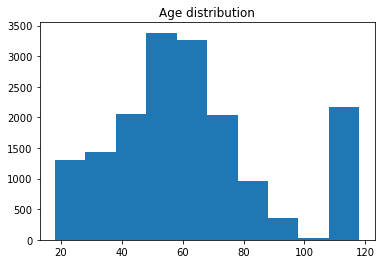

In [346]:
plt.hist(profile.age)
#sns.distplot(profile.age)
plt.title("Age distribution")

In [347]:
profile.age.skew()

0.761858091149862

Text(0.5, 1.0, 'Income distribution')

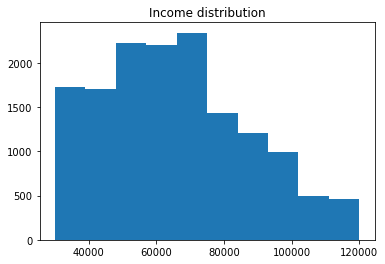

In [348]:
plt.hist(profile.income.dropna())
plt.title("Income distribution")

In [349]:
profile.income.dropna().skew()

0.4020051048412755

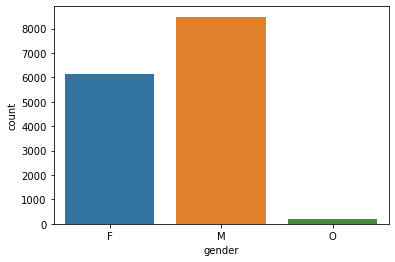

In [350]:
sns.countplot(profile.gender)

In [351]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

### Observation on profile:

This dataset contains demographic data about members enrolled in the reward program with self-explanatory features. There are 17,000 rows (representing 17,000 customer profiles) and 5 columns. There are 2175 problematic rows with missing values and clear outliers.


In [352]:

#Change type of 'became_member_on' column from int to time:
profile_clean = profile.copy()
profile_clean.became_member_on = pd.to_datetime(profile_clean.became_member_on.astype(str), format="%Y/%m/%d")

In [353]:
profile_clean.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [354]:
# renaming 'id' column to 'person' in profile dataset so that we can later merge it with transcript dataset
profile_clean.rename(columns={profile_clean.columns[2]:'person'}, inplace=True)

In [355]:
profile_clean.head(3)

,gender,age,person,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN


In [356]:
# Missing values in 'gender' column are recorded as NoneType, in 'income' column - as NaNs. 
type(profile_clean.gender[0]), type(profile_clean.income[0])

(NoneType, numpy.float64)

In [357]:
# Replace NoneType with Nans in gender column
profile_clean.gender.fillna(value=np.nan, inplace=True)

In [358]:
profile_clean.head(5)

,gender,age,person,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [359]:
#checking the result of transformation
type(profile_clean.gender[0]), type(profile.income[0])

(float, numpy.float64)

In [360]:
# Replace 118 with Nans in age column:
profile_clean.age.replace(118, np.nan, inplace=True)

In [361]:
#reorganize the columns order
profile_clean = profile_clean[['person', 'became_member_on', 'gender', 'age', 'income']]

In [362]:
profile_clean.head()

,person,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,NaN,NaN


In [363]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [364]:
transcript.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


In [365]:
transcript.shape

(306534, 4)

In [366]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [367]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [368]:
print(f"experiment lasted for max {transcript.time.max()/24} days")

experiment lasted for max 29.75 days


In [369]:
transcript[transcript.person == '78afa995795e4d85b5d9ceeca43f5fef']

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378


Note: We have many records for one person that are organized chronologically. 'Value' column is currently a json format with either 'offer_id' for offers completed, 'amount' of transactions and 'offer id' for offers received and offers viewed.

In [370]:
transcript.loc[transcript.event=="transaction"].value.head()

12654    {'amount': 0.8300000000000001}
12657                 {'amount': 34.56}
12659                 {'amount': 13.23}
12670                 {'amount': 19.51}
12671                 {'amount': 18.97}
Name: value, dtype: object

In [371]:
transcript.loc[transcript.event=="offer received"].value.head()

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
Name: value, dtype: object

In [372]:
transcript.loc[transcript.event=="offer viewed"].value.head()

12650    {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
12651    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
12652    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
12653    {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12655    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
Name: value, dtype: object

In [373]:
transcript.loc[transcript.event=="offer completed"].value.head()

12658    {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672    {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679    {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692    {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697    {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
Name: value, dtype: object

### observation in transcript:

This dataset contains records of activities related to the test simulated. Each record is time-stamped since the start of the test. The test start at t=0 and ends at t=714 (≈ 30 days). The nature of each record is described using event. The value column holds a value based on the event column. For offer received, viewed, and completed, the offer id is recorded. For transaction, the amount is recorded. Although this dataset is somehow abstract, 306534 rows and 4 columns.

In [374]:
transcript.value

0         {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2         {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4         {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
                                ...                       
306529                      {'amount': 1.5899999999999999}
306530                                    {'amount': 9.53}
306531                                    {'amount': 3.61}
306532                      {'amount': 3.5300000000000002}
306533                                    {'amount': 4.05}
Name: value, Length: 306534, dtype: object

In [375]:
# normalize json in value column
value_normalized = json_normalize(transcript['value'])

In [376]:
value_normalized

,offer id,amount,offer_id,reward
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN
...,...,...,...,...
306529,NaN,1.59,NaN,NaN
306530,NaN,9.53,NaN,NaN
306531,NaN,3.61,NaN,NaN
306532,NaN,3.53,NaN,NaN


In [377]:
# merging the two columns 'offer id' and 'offer_id' into new one 'id'
value_normalized['id'] = value_normalized['offer id'].fillna(value_normalized['offer_id'])

In [378]:
value_normalized

,offer id,amount,offer_id,reward,id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,NaN,1.59,NaN,NaN,NaN
306530,NaN,9.53,NaN,NaN,NaN
306531,NaN,3.61,NaN,NaN,NaN
306532,NaN,3.53,NaN,NaN,NaN


In [379]:
value_normalized.drop(["offer id","offer_id"],axis=1,inplace=True)

In [380]:
value_normalized.head()

,amount,reward,id
0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [381]:
value_normalized.rename(columns={"reward":"rewarded"},inplace=True)

In [382]:
value_normalized.head()

,amount,rewarded,id
0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [383]:
transcript_clean=transcript.join(value_normalized)

In [384]:
transcript_clean.head()

,person,event,value,time,amount,rewarded,id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [385]:
transcript_clean.drop("value",axis=1,inplace=True)

In [386]:
transcript_clean.head(3)

,person,event,time,amount,rewarded,id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5


In [387]:
transcript_clean.rewarded.value_counts()

5.0     12070
2.0      9334
10.0     7019
3.0      5156
Name: rewarded, dtype: int64

In [388]:
transcript_clean=transcript_clean[["person","id","event","amount","rewarded","time"]]

In [389]:
transcript_clean.head(4)

,person,id,event,amount,rewarded,time
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,NaN,NaN,0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,NaN,NaN,0
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,offer received,NaN,NaN,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,offer received,NaN,NaN,0


## Combining datasets

. Merging Profile and Transcript datasets on customer ids:

In [390]:
# checking the number of rows in the datasets
profile_clean.shape, transcript.shape

((17000, 5), (306534, 4))

In [391]:
# because transcipt has more rows, we will do the right join
df = profile_clean.merge(transcript_clean, on='person', how='right')

In [392]:
df.shape

(306534, 10)

In [393]:
df.head()

,person,became_member_on,gender,age,income,id,event,amount,rewarded,time
0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,NaN,NaN,0
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer viewed,NaN,NaN,6
2,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,NaN,transaction,19.89,NaN,132
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,NaN,5.0,132
4,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,NaN,transaction,17.78,NaN,144


1.2. Merging with Portfolio dataset

In [394]:
starbucks = df.merge(portfolio, on='id', how='left')

In [395]:
starbucks.head()

,person,became_member_on,gender,age,income,id,event,amount,rewarded,time,reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,NaN,NaN,0,5.0,"[web, email, mobile]",5.0,7.0,bogo
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer viewed,NaN,NaN,6,5.0,"[web, email, mobile]",5.0,7.0,bogo
2,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,NaN,transaction,19.89,NaN,132,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,NaN,5.0,132,5.0,"[web, email, mobile]",5.0,7.0,bogo
4,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,NaN,transaction,17.78,NaN,144,NaN,NaN,NaN,NaN,NaN


### one hot encoding offer type

In [396]:
starbucks_fin = pd.get_dummies(starbucks, columns=['event', 'offer_type'])

In [397]:
# reordering the columns
starbucks_fin = starbucks_fin[['person', 'became_member_on', 'age', 'income','gender',
                               'id', 'amount','rewarded', 'time', 
                               'event_offer completed', 'event_offer received', 'event_offer viewed',
                               'event_transaction', 'offer_type_bogo', 'offer_type_discount',
                               'offer_type_informational']]

In [398]:
starbucks_fin.head()

,person,became_member_on,age,income,gender,id,amount,rewarded,time,event_offer completed,event_offer received,event_offer viewed,event_transaction,offer_type_bogo,offer_type_discount,offer_type_informational
0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,0,0,1,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,6,0,0,1,0,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,NaN,19.89,NaN,132,0,0,0,1,0,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,132,1,0,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,NaN,17.78,NaN,144,0,0,0,1,0,0,0


In [399]:
# renaming the columns
starbucks_fin.columns = ['person', 'became_member_on', 'age', 'income', 'gender',
                         'id', 'amount','rewarded', 'time',
                         'offer_completed', 'offer_received', 'offer_viewed',
                         'transaction', 'bogo', 'discount', 'informational']

In [400]:
starbucks_fin.head()

,person,became_member_on,age,income,gender,id,amount,rewarded,time,offer_completed,offer_received,offer_viewed,transaction,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,0,0,1,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,6,0,0,1,0,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,NaN,19.89,NaN,132,0,0,0,1,0,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,132,1,0,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,75.0,100000.0,F,NaN,17.78,NaN,144,0,0,0,1,0,0,0


In [401]:
starbucks_fin.shape

(306534, 16)

In [402]:
starbucks=starbucks_fin.copy()

### Aggregation at Offer Level:
To correctly attribute conversion rates and response rate, we need to organize data by time. In the following, I create columns with time for when offers were received, when they were viewed and when they were completed

In [403]:
starbucks_time = starbucks[starbucks.transaction == 0][['person', 'id', 'offer_received', 'offer_viewed', 'offer_completed', 'time']]

In [404]:
starbucks_time.head()

,person,id,offer_received,offer_viewed,offer_completed,time
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,6
3,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,132
5,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,1,0,0,168
6,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,0,1,0,216


In [405]:

print("total number of offers sent:", starbucks_time[starbucks_time['offer_received'] == 1].shape[0])

total number of offers sent: 76277


In [406]:
starbucks_time_aggr = starbucks_time.groupby(['person', 'id']).sum().reset_index()

In [407]:
starbucks_time_aggr

,person,id,offer_received,offer_viewed,offer_completed,time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,0,1,1152
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,1,0,708
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,1,0,360
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1278
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1572
...,...,...,...,...,...,...
63283,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,2,2,2,1476
63284,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,1,540
63285,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3,3,3,4044
63286,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,1542


In [408]:
print("number of offers recieved only once",starbucks_time_aggr[starbucks_time_aggr.offer_received==1].offer_received.sum())

number of offers recieved only once 51570


In [409]:
print("number of offers that were received more than once",starbucks_time_aggr[starbucks_time_aggr.offer_received>1].offer_received.sum())

number of offers that were received more than once 24707


Later in this notebook, we will produce a lot of values with 0s after aggregation steps. In time column 0 means hour, but when aggregating things 0 means no event. So to avoid confusion, let's reencode time=0 with time=0.5.

In [410]:

starbucks_time['time'] = starbucks_time.time.replace(0, 0.5)

Because we have offers that were sent more than once, the offer_id is no longer unique identifier. We need to create a new unique id of each offer sent, irrespective whether customer already received it earlier or not. This is not a trivial task. To do this, I use the function cumcount() to create a counter for identical offers. This is possible because our data is time ordered.

In [411]:
starbucks_time['id_unique_received'] = starbucks_time[starbucks_time.offer_received == 1].groupby(['person', 'id']).cumcount()

In [412]:
starbucks_time

,person,id,offer_received,offer_viewed,offer_completed,time,id_unique_received
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0.5,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,6.0,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,132.0,NaN
5,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,1,0,0,168.0,0.0
6,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,0,1,0,216.0,NaN
...,...,...,...,...,...,...,...
306528,ebae5093b436466c9fbd097cb7434023,fafdcd668e3743c1bb461111dcafc2a4,0,0,1,660.0,NaN
306529,912b9f623b9e4b4eb99b6dc919f09a93,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,576.0,0.0
306530,912b9f623b9e4b4eb99b6dc919f09a93,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,594.0,NaN
306531,3045af4e98794a04a5542d3eac939b1f,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,576.0,0.0


In [413]:
starbucks_time['id_unique_viewed'] = starbucks_time[starbucks_time.offer_viewed == 1].groupby(['person', 'id']).cumcount()
starbucks_time['id_unique_completed'] = starbucks_time[starbucks_time.offer_completed == 1].groupby(['person', 'id']).cumcount()
starbucks_time['id_unique_events'] = starbucks_time[['id_unique_received', 'id_unique_viewed', 'id_unique_completed']].max(axis=1).values
starbucks_time['id_unique'] = starbucks_time['id'] + "-" + starbucks_time['id_unique_events'].apply(lambda x: str(x))

In [414]:
starbucks_time

,person,id,offer_received,offer_viewed,offer_completed,time,id_unique_received,id_unique_viewed,id_unique_completed,id_unique_events,id_unique
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0.5,0.0,NaN,NaN,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,6.0,NaN,0.0,NaN,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0
3,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,132.0,NaN,NaN,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0
5,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,1,0,0,168.0,0.0,NaN,NaN,0.0,5a8bc65990b245e5a138643cd4eb9837-0.0
6,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,0,1,0,216.0,NaN,0.0,NaN,0.0,5a8bc65990b245e5a138643cd4eb9837-0.0
...,...,...,...,...,...,...,...,...,...,...,...
306528,ebae5093b436466c9fbd097cb7434023,fafdcd668e3743c1bb461111dcafc2a4,0,0,1,660.0,NaN,NaN,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4-0.0
306529,912b9f623b9e4b4eb99b6dc919f09a93,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,576.0,0.0,NaN,NaN,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0-0.0
306530,912b9f623b9e4b4eb99b6dc919f09a93,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,594.0,NaN,0.0,NaN,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0-0.0
306531,3045af4e98794a04a5542d3eac939b1f,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,576.0,0.0,NaN,NaN,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0-0.0


In [415]:
starbucks_time['offer_received_time'] = starbucks_time['offer_received']*starbucks_time.time
starbucks_time['offer_viewed_time'] = starbucks_time['offer_viewed']*starbucks_time.time
starbucks_time['offer_completed_time'] = starbucks_time['offer_completed']*starbucks_time.time
starbucks_time = starbucks_time[['person', 'id_unique', 'id', 'time', 'offer_received_time', 'offer_viewed_time', 'offer_completed_time']]

In [416]:
starbucks_time

,person,id_unique,id,time,offer_received_time,offer_viewed_time,offer_completed_time
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.5,0.5,0.0,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,6.0,0.0,6.0,0.0
3,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,132.0,0.0,0.0,132.0
5,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837-0.0,5a8bc65990b245e5a138643cd4eb9837,168.0,168.0,0.0,0.0
6,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837-0.0,5a8bc65990b245e5a138643cd4eb9837,216.0,0.0,216.0,0.0
...,...,...,...,...,...,...,...
306528,ebae5093b436466c9fbd097cb7434023,fafdcd668e3743c1bb461111dcafc2a4-0.0,fafdcd668e3743c1bb461111dcafc2a4,660.0,0.0,0.0,660.0
306529,912b9f623b9e4b4eb99b6dc919f09a93,4d5c57ea9a6940dd891ad53e9dbe8da0-0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,576.0,576.0,0.0,0.0
306530,912b9f623b9e4b4eb99b6dc919f09a93,4d5c57ea9a6940dd891ad53e9dbe8da0-0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,594.0,0.0,594.0,0.0
306531,3045af4e98794a04a5542d3eac939b1f,4d5c57ea9a6940dd891ad53e9dbe8da0-0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,576.0,576.0,0.0,0.0


In [417]:
# unstack values to get to the level of each (person, offer id) tuple
# take max values to avoid 0s
starbucks_time_full = starbucks_time.groupby(by=['person', 'id_unique', 'time']).max().unstack()
starbucks_time_full.fillna(0, inplace=True)

In [418]:
starbucks_time_full

id  \
time                                                                                              0.5     
person                           id_unique                                                                
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5-0.0                                 0   
                                 3f207df678b143eea3cee63160fa8bed-0.0                                 0   
                                 5a8bc65990b245e5a138643cd4eb9837-0.0                                 0   
                                 f19421c1d4aa40978ebb69ca19b0e20d-0.0                                 0   
                                 fafdcd668e3743c1bb461111dcafc2a4-0.0                                 0   
...                                                                                                 ...   
ffff82501cea40309d5fdd7edcca4a07 2906b810c7d4411798c6938adc9daaa5-0.0                                 0   
                                 2906b810c7d4411798c6938adc9daaa5-1.0                                 0   
                                 2906b810c7d4411798c6938adc9daaa5-2.0                                 0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0                                 0   
                                 fafdcd668e3743c1bb461111dcafc2a4-0.0  fafdcd668e3743c1bb461111dcafc2a4   

                                                                                                         \
time                                                                                              6.0     
person                           id_unique                                                                
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5-0.0                                 0   
                                 3f207df678b143eea3cee63160fa8bed-0.0                                 0   
                                 5a8bc65990b245e5a138643cd4eb9837-0.0                                 0   
                                 f19421c1d4aa40978ebb69ca19b0e20d-0.0                                 0   
                                 fafdcd668e3743c1bb461111dcafc2a4-0.0                                 0   
...                                                                                                 ...   
ffff82501cea40309d5fdd7edcca4a07 2906b810c7d4411798c6938adc9daaa5-0.0                                 0   
                                 2906b810c7d4411798c6938adc9daaa5-1.0                                 0   
                                 2906b810c7d4411798c6938adc9daaa5-2.0                                 0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0                                 0   
                                 fafdcd668e3743c1bb461111dcafc2a4-0.0  fafdcd668e3743c1bb461111dcafc2a4   

                                                                             \
time                                                                  12.0    
person                           id_unique                                    
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5-0.0     0   
                                 3f207df678b143eea3cee63160fa8bed-0.0     0   
                                 5a8bc65990b245e5a138643cd4eb9837-0.0     0   
                                 f19421c1d4aa40978ebb69ca19b0e20d-0.0     0   
                                 fafdcd668e3743c1bb461111dcafc2a4-0.0     0   
...                                                                     ...   
ffff82501cea40309d5fdd7edcca4a07 2906b810c7d4411798c6938adc9daaa5-0.0     0   
                                 2906b810c7d4411798c6938adc9daaa5-1.0     0   
                                 2906b810c7d4411798c6938adc9daaa5-2.0     0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0     0   
                                 fafdcd668e3743c1bb461111dcafc2a4-0.0     0 

In [419]:
offers = pd.DataFrame(starbucks_time_full.index.get_level_values('id_unique'), starbucks_time_full.index.get_level_values('person')).reset_index()


In [420]:
offers

,person,id_unique
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0
...,...,...
76272,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-0.0
76273,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-1.0
76274,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-2.0
76275,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0


In [421]:

offers['offer_received_time'] = starbucks_time_full['offer_received_time'].values.max(axis=1)
offers['offer_viewed_time'] = starbucks_time_full['offer_viewed_time'].values.max(axis=1)
offers['offer_completed_time'] = starbucks_time_full['offer_completed_time'].values.max(axis=1)

In [422]:
print("number of offers in the final dataset:", offers.shape[0])
offers.head()

number of offers in the final dataset: 76277


,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0,504.0,540.0,528.0


Note: 0s in offer_viewed_time and offer_completed_time mean they weren't viewed or completed
    Now we need to add offer end time for each offer by adding offer valid time to its received time:

In [423]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [424]:
offers['id']=offers.id_unique.apply(lambda x:x.split("-")[0])
offers.head()

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0,2906b810c7d4411798c6938adc9daaa5
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0,3f207df678b143eea3cee63160fa8bed
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0,5a8bc65990b245e5a138643cd4eb9837
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0,f19421c1d4aa40978ebb69ca19b0e20d
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0,504.0,540.0,528.0,fafdcd668e3743c1bb461111dcafc2a4


In [425]:
offers=offers.merge(portfolio,on="id",how="left")

In [426]:
offers.head()

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0,504.0,540.0,528.0,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount


In [427]:
offers['offer_end_time'] = offers['offer_received_time']+offers['duration'].values*24

In [428]:
offers.head()

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type,offer_end_time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,744.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational,432.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational,240.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo,528.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0,504.0,540.0,528.0,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount,744.0


Then I encode each offer that was viewed on time (i.e. if offer was viewed before its end time) with 1s, otherwise with 0s. The same procedure is repeated for offers completed on time. However, to be properly completed offer should have been viewed. Hence I create a new column "completed after viewing" to encode completed offers correctly.

In [429]:
offers['viewed_binary'] = offers.offer_viewed_time.apply(lambda x: 1 if x > 0 else 0)

In [430]:
offers

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type,offer_end_time,viewed_binary
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,744.0,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational,432.0,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational,240.0,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo,528.0,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0,504.0,540.0,528.0,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount,744.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76272,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-0.0,336.0,354.0,384.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,504.0,1
76273,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-1.0,408.0,414.0,414.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,576.0,1
76274,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-2.0,576.0,582.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,744.0,1
76275,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0,504.0,534.0,504.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,672.0,1


In [431]:
# 0 if viewed_time < end_time and 1 otherwise, multiply whether the offer was indeed viewed 
# (because 0 time is also < end time, but it means that the offer was not viewed!)
offers['viewed_on_time'] = (offers.offer_viewed_time < offers.offer_end_time)*offers['viewed_binary']

In [432]:
offers

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type,offer_end_time,viewed_binary,viewed_on_time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,744.0,0,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational,432.0,1,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational,240.0,1,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo,528.0,1,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4-0.0,504.0,540.0,528.0,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount,744.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76272,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-0.0,336.0,354.0,384.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,504.0,1,1
76273,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-1.0,408.0,414.0,414.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,576.0,1,1
76274,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5-2.0,576.0,582.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,744.0,1,1
76275,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0,504.0,534.0,504.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,672.0,1,1


In [433]:
offers["completed_binary"]=offers.offer_completed_time.apply(lambda x:1 if x>0 else 0)

In [434]:
offers['completed_on_time'] = (offers.offer_completed_time < offers.offer_end_time)*offers['completed_binary']

In [435]:
offers.head(4)

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type,offer_end_time,viewed_binary,viewed_on_time,completed_binary,completed_on_time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5-0.0,576.0,0.0,576.0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount,744.0,0,0,1,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed-0.0,336.0,372.0,0.0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational,432.0,1,1,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837-0.0,168.0,192.0,0.0,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational,240.0,1,1,0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d-0.0,408.0,456.0,414.0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo,528.0,1,1,1,1


### correctly attributed completed offers need to meet several conditions:
1. it should be completed before offer end

In [436]:
completed_before_expires=(offers.offer_completed_time<offers.offer_end_time)

 2. it should be completed after viewing

In [437]:
completed_after_viewing=(offers.offer_completed_time>offers.offer_viewed_time)*offers["viewed_binary"]
offers["completed_after_viewing"]=(completed_after_viewing & completed_before_expires)*offers["completed_binary"]

In [438]:
offers[offers.completed_after_viewing == 1].head()

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type,offer_end_time,viewed_binary,viewed_on_time,completed_binary,completed_on_time,completed_after_viewing
7,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7-0.0,408.0,432.0,576.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount,648.0,1,1,1,1,1
8,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2-0.0,168.0,186.0,252.0,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"[web, email, mobile, social]",7,7,discount,336.0,1,1,1,1,1
11,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9-0.0,504.0,516.0,576.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,672.0,1,1,1,1,1
12,0020c2b971eb4e9188eac86d93036a77,4d5c57ea9a6940dd891ad53e9dbe8da0-0.0,408.0,426.0,510.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"[web, email, mobile, social]",10,5,bogo,528.0,1,1,1,1,1
15,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4-0.0,0.5,12.0,54.0,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount,240.5,1,1,1,1,1


In [439]:
offers[(offers.person == '0020c2b971eb4e9188eac86d93036a77') & (offers.id == 'fafdcd668e3743c1bb461111dcafc2a4')]

,person,id_unique,offer_received_time,offer_viewed_time,offer_completed_time,id,reward,channels,difficulty,duration,offer_type,offer_end_time,viewed_binary,viewed_on_time,completed_binary,completed_on_time,completed_after_viewing
15,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4-0.0,0.5,12.0,54.0,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount,240.5,1,1,1,1,1
16,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4-1.0,336.0,0.0,510.0,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount,576.0,0,0,1,1,0


In [440]:
starbucks[(starbucks.person == '0020c2b971eb4e9188eac86d93036a77') & (starbucks.id == 'fafdcd668e3743c1bb461111dcafc2a4')]

,person,became_member_on,age,income,gender,id,amount,rewarded,time,offer_completed,offer_received,offer_viewed,transaction,bogo,discount,informational
35741,0020c2b971eb4e9188eac86d93036a77,2016-03-04,59.0,90000.0,F,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,0,0,1,0,0,0,1,0
35742,0020c2b971eb4e9188eac86d93036a77,2016-03-04,59.0,90000.0,F,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,12,0,0,1,0,0,1,0
35744,0020c2b971eb4e9188eac86d93036a77,2016-03-04,59.0,90000.0,F,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,54,1,0,0,0,0,1,0
35749,0020c2b971eb4e9188eac86d93036a77,2016-03-04,59.0,90000.0,F,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,336,0,1,0,0,0,1,0
35754,0020c2b971eb4e9188eac86d93036a77,2016-03-04,59.0,90000.0,F,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,510,1,0,0,0,0,1,0


In [441]:
print("total number of recorded offers completed:", offers.completed_binary.sum())
print("true number of offers completed after viewing and on time:", offers.completed_after_viewing.sum())
print("misattributed offers (false positives - completed, while not viewed; viewed after completed):", offers.completed_binary.sum()-offers.completed_after_viewing.sum())

total number of recorded offers completed: 33579
true number of offers completed after viewing and on time: 19656
misattributed offers (false positives - completed, while not viewed; viewed after completed): 13923


### Aggregation at person level
Now we are ready to aggreate this information on the customer level and count how many offers were received by each customer, how many offers were viewed on time, how many offers were completed on time (as recorded), how many offers were completed after viewing.

In [442]:
offers_by_person = pd.DataFrame(offers.groupby('person').id_unique.count())
offers_by_person.shape

(16994, 1)

In [443]:
offers_by_person

,id_unique
person,
0009655768c64bdeb2e877511632db8f,5
00116118485d4dfda04fdbaba9a87b5c,2
0011e0d4e6b944f998e987f904e8c1e5,5
0020c2b971eb4e9188eac86d93036a77,5
0020ccbbb6d84e358d3414a3ff76cffd,4
...,...
fff3ba4757bd42088c044ca26d73817a,6
fff7576017104bcc8677a8d63322b5e1,5
fff8957ea8b240a6b5e634b6ee8eafcf,3


There are 6 people in the dataset that haven't received any offers. So our final dataset will be reduced by this number:

In [444]:
customers_without_offers = set(starbucks.person.unique()) - set(offers_by_person.reset_index().person.unique())

In [445]:
customers_without_offers

{'12ede229379747bd8d74ccdc20097ca3',
 '3a4874d8f0ef42b9a1b72294902afea9',
 'ae8111e7e8cd4b60a8d35c42c1110555',
 'c6e579c6821c41d1a7a6a9cf936e91bb',
 'da7a7c0dcfcb41a8acc7864a53cf60fb',
 'eb540099db834cf59001f83a4561aef3'}

In [447]:
offers_by_person.columns = ['offers_received']
offers_by_person.columns

Index(['offers_received'], dtype='object')

In [448]:
offers_by_person['offers_viewed_on_time'] = pd.Series(offers.groupby('person').viewed_on_time.sum())

In [449]:
offers_by_person

,offers_received,offers_viewed_on_time
person,,
0009655768c64bdeb2e877511632db8f,5,4
00116118485d4dfda04fdbaba9a87b5c,2,2
0011e0d4e6b944f998e987f904e8c1e5,5,5
0020c2b971eb4e9188eac86d93036a77,5,2
0020ccbbb6d84e358d3414a3ff76cffd,4,4
...,...,...
fff3ba4757bd42088c044ca26d73817a,6,2
fff7576017104bcc8677a8d63322b5e1,5,4
fff8957ea8b240a6b5e634b6ee8eafcf,3,2


In [450]:
offers_by_person['offers_completed_on_time'] = pd.Series(offers.groupby('person').completed_on_time.sum())
offers_by_person['offers_completed_after_viewing'] = pd.Series(offers.groupby('person').completed_after_viewing.sum())

Finally, we can calculate the response rate (offers viewed/offers received) and conversion rates (offers completed after viewing/offers viewed) for each customer:

In [452]:
offers_by_person['offers_rr'] = offers_by_person.offers_viewed_on_time/offers_by_person.offers_received
offers_by_person['offers_cvr'] = offers_by_person.offers_completed_after_viewing/offers_by_person.offers_viewed_on_time

In [453]:
offers.shape

(76277, 17)

In [454]:
offers_by_person.head()

,offers_received,offers_viewed_on_time,offers_completed_on_time,offers_completed_after_viewing,offers_rr,offers_cvr
person,,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,0,0.8,0.00
00116118485d4dfda04fdbaba9a87b5c,2,2,0,0,1.0,0.00
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,3,1.0,0.60
0020c2b971eb4e9188eac86d93036a77,5,2,3,2,0.4,1.00
0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,3,1.0,0.75


Now let's calculate correctly and incorrectly attributed rewards per person

In [455]:
# CORRECTLY attributed BOGO amount (completed after viewing)
cond_correct = (offers.offer_type == 'bogo') & (offers.completed_after_viewing == 1) 
total_bogo = offers[cond_correct].groupby(by='person').reward.sum()
offers_by_person = offers_by_person.merge(total_bogo, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'total_bogo'}, inplace=True)

In [456]:
total_bogo

person
0011e0d4e6b944f998e987f904e8c1e5     5
0020c2b971eb4e9188eac86d93036a77    10
0020ccbbb6d84e358d3414a3ff76cffd    10
004b041fbfe44859945daa2c7f79ee64     5
004c5799adbf42868b9cff0396190900    10
                                    ..
ffd53e5ba61d41378b66efc00d9f9682    10
ffdefcac307f4ca99ac1ebd51470f106    10
ffe5257abf8840b395e1ee6b29894637     5
fff29fb549084123bd046dbc5ceb4faa    20
fffad4f4828548d1b5583907f2e9906b    10
Name: reward, Length: 6395, dtype: int64

In [457]:
offers_by_person

,offers_received,offers_viewed_on_time,offers_completed_on_time,offers_completed_after_viewing,offers_rr,offers_cvr,total_bogo
person,,,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,0,0.800000,0.00,NaN
00116118485d4dfda04fdbaba9a87b5c,2,2,0,0,1.000000,0.00,NaN
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,3,1.000000,0.60,5.0
0020c2b971eb4e9188eac86d93036a77,5,2,3,2,0.400000,1.00,10.0
0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,3,1.000000,0.75,10.0
...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,6,2,3,0,0.333333,0.00,NaN
fff7576017104bcc8677a8d63322b5e1,5,4,3,2,0.800000,0.50,NaN
fff8957ea8b240a6b5e634b6ee8eafcf,3,2,0,0,0.666667,0.00,NaN


In [458]:
# CORRECTLY attributed BOGO number (completed after viewing)
bogo = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(bogo, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'bogo_completed'}, inplace=True)

In [459]:
# INCORRECTLY attributed BOGO amount 
cond_incorrect = ((offers.offer_type == 'bogo') & (offers.completed_after_viewing == 0) & (offers.completed_binary == 1))
total_bogo_incorr = offers[cond_incorrect].groupby(by='person').reward.sum()
offers_by_person = offers_by_person.merge(total_bogo_incorr, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'total_bogo_incorr'}, inplace=True)

# INCORRECTLY attributed BOGO number (completed without viewing)
bogo_incorr = offers[cond_incorrect].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(bogo_incorr, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'bogo_completed_incorr'}, inplace=True)

In [460]:
print("number of customers with bogo completed (as recorded):", ((offers.offer_type == 'bogo') & (offers.completed_binary == 1)).sum())
print("number of customers with correctly attributed completed bogo offers:", offers[cond_correct].shape[0])
print("number of customers with incorrectly attributed completed bogo offers:", offers[cond_incorrect].shape[0])


number of customers with bogo completed (as recorded): 15669
number of customers with correctly attributed completed bogo offers: 8843
number of customers with incorrectly attributed completed bogo offers: 6826


In [461]:
# CORRECTLY attributed DISCOUNT amount (completed after viewing)
cond_correct = (offers.offer_type == 'discount') & (offers.completed_after_viewing == 1) 
total_bogo_corr = offers[cond_correct].groupby(by='person').reward.sum()
offers_by_person = offers_by_person.merge(total_bogo_corr, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'total_discount'}, inplace=True)

# CORRECTLY attributed DISCOUNT number (completed after viewing)
discount = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(discount, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'discount_completed'}, inplace=True)

In [462]:
# INCORRECTLY attributed DISCOUNT amount 
cond_incorrect = ((offers.offer_type == 'discount') & (offers.completed_after_viewing == 0) & (offers.completed_binary == 1))
total_bogo_incorr = offers[cond_incorrect].groupby(by='person').reward.sum()
offers_by_person = offers_by_person.merge(total_bogo_incorr, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'total_discount_incorr'}, inplace=True)

# INCORRECTLY attributed DISCOUNT number (completed without viewing)
discount_incorr = offers[cond_incorrect].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(discount_incorr, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'discount_completed_incorr'}, inplace=True)

In [463]:
print("number of discounts completed (as recorded):", ((offers.offer_type == 'discount') & (offers.completed_binary == 1)).sum())
print("number of correctly attributed completed discount offers:", offers[cond_correct].shape[0])
print("number of incorrectly attributed completed discount offers:", offers[cond_incorrect].shape[0])

number of discounts completed (as recorded): 17910
number of correctly attributed completed discount offers: 10813
number of incorrectly attributed completed discount offers: 7097


In [464]:
# CORRECTLY attributed INFORMATIONAL number (viewed on time)
cond_correct = ((offers.offer_type == 'informational') & (offers.viewed_on_time == 1))
                                                              
informational = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(informational, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'informational_viewed'}, inplace=True)

In [465]:
# INCORRECTLY attributed INFORMATIONAL number (viewed not on time)
cond_incorrect = ((offers.offer_type == 'informational') & (offers.viewed_on_time == 0))
                                                              
informational_incorr = offers[cond_incorrect].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(informational_incorr, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'informational_incorr'}, inplace=True)

In [466]:
offers_by_person.head(10)

,offers_received,offers_viewed_on_time,offers_completed_on_time,offers_completed_after_viewing,offers_rr,offers_cvr,total_bogo,bogo_completed,total_bogo_incorr,bogo_completed_incorr,total_discount,discount_completed,total_discount_incorr,discount_completed_incorr,informational_viewed,informational_incorr
person,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,0,0.800000,0.00,NaN,NaN,5.0,1.0,NaN,NaN,4.0,2.0,2.0,NaN
00116118485d4dfda04fdbaba9a87b5c,2,2,0,0,1.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,3,1.000000,0.60,5.0,1.0,NaN,NaN,8.0,2.0,NaN,NaN,2.0,NaN
0020c2b971eb4e9188eac86d93036a77,5,2,3,2,0.400000,1.00,10.0,1.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,1.0
0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,3,1.000000,0.75,10.0,2.0,NaN,NaN,3.0,1.0,NaN,NaN,1.0,NaN
003d66b6608740288d6cc97a6903f4f0,5,4,3,2,0.800000,0.50,NaN,NaN,NaN,NaN,4.0,2.0,5.0,1.0,2.0,NaN
00426fe3ffde4c6b9cb9ad6d077a13ea,5,2,1,1,0.400000,0.50,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN
004b041fbfe44859945daa2c7f79ee64,3,2,2,2,0.666667,1.00,5.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0
004c5799adbf42868b9cff0396190900,5,4,5,3,0.800000,0.75,10.0,2.0,10.0,1.0,2.0,1.0,2.0,1.0,NaN,NaN


In [467]:
print("total number of recorded offers completed:", offers.completed_binary.sum())
print("true number of offers completed after viewing and on time:", offers.completed_after_viewing.sum())
print("misattributed offers (false positives - completed, while not viewed; viewed after completed):", offers.completed_binary.sum()-offers.completed_after_viewing.sum())
print(70*"-")
print("BOGO:")
print("number of customers with bogo completed (as recorded):", ((offers.offer_type == 'bogo') & (offers.completed_binary == 1)).sum())
print("number of correctly attributed completed bogo offers:", offers_by_person.bogo_completed.sum())
print("number of incorrectly attributed completed bogo offers:", offers_by_person.bogo_completed_incorr.sum())
print(70*"-")
print("DISCOUNT:")
print("number of customers with discounts completed (as recorded):", ((offers.offer_type == 'discount') & (offers.completed_binary == 1)).sum())
print("number of correctly attributed completed discount offers:", offers_by_person.discount_completed.sum())
print("number of incorrectly attributed completed discount offers:", offers_by_person.discount_completed_incorr.sum())

total number of recorded offers completed: 33579
true number of offers completed after viewing and on time: 19656
misattributed offers (false positives - completed, while not viewed; viewed after completed): 13923
----------------------------------------------------------------------
BOGO:
number of customers with bogo completed (as recorded): 15669
number of correctly attributed completed bogo offers: 8843.0
number of incorrectly attributed completed bogo offers: 6826.0
----------------------------------------------------------------------
DISCOUNT:
number of customers with discounts completed (as recorded): 17910
number of correctly attributed completed discount offers: 10813.0
number of incorrectly attributed completed discount offers: 7097.0


In [468]:
# total amount rewarded
offers_by_person['total_rewarded'] = pd.DataFrame(starbucks.groupby('person').rewarded.sum())
cond_corr = (offers.completed_after_viewing == 1)
offers_by_person['total_rewarded_corr'] = pd.DataFrame(offers[cond_corr].groupby('person').reward.sum())
cond_incorr = (offers.completed_after_viewing == 0) & (offers.completed_binary == 1)
offers_by_person['total_rewarded_incorr'] = pd.DataFrame(offers[cond_incorr].groupby('person').reward.sum())

In [469]:
print(f"total amount rewarded: ${offers_by_person.total_rewarded.sum():.0f}")
print(f"total amount correctly rewarded: ${offers_by_person.total_rewarded_corr.sum():.0f}")
print(f"total amount wasted (incorrectly rewarded): ${offers_by_person.total_rewarded_incorr.sum():.0f}")
print(70*"-")
print(f"BOGO rewarded correctly: ${offers_by_person.total_bogo.sum():.0f}")
print(f"BOGO wasted: ${offers_by_person.total_bogo_incorr.sum():.0f}")
print(70*"-")
print(f"DISCOUNT rewarded correctly: ${offers_by_person.total_discount.sum():.0f}")
print(f"DISCOUNT wasted:${offers_by_person.total_discount_incorr.sum():.0f}")


total amount rewarded: $164676
total amount correctly rewarded: $94893
total amount wasted (incorrectly rewarded): $69783
----------------------------------------------------------------------
BOGO rewarded correctly: $66005
BOGO wasted: $47435
----------------------------------------------------------------------
DISCOUNT rewarded correctly: $28888
DISCOUNT wasted:$22348


In [470]:
# CORRECTLY attributed BOGO viewed number 
cond_correct = (offers.offer_type == 'bogo') & (offers.viewed_on_time == 1) 

bogo_viewed = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(bogo_viewed, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'bogo_viewed'}, inplace=True)

In [471]:
# BOGO received number 
cond_correct = (offers.offer_type == 'bogo')

bogo_received = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(bogo_received, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'bogo_received'}, inplace=True)


In [472]:
offers_by_person['bogo_rr'] = offers_by_person.bogo_viewed/offers_by_person.bogo_received
offers_by_person['bogo_cvr'] = offers_by_person.bogo_completed/offers_by_person.bogo_viewed

Addin discount_rr, discount_cvr:

In [473]:
# CORRECTLY attributed DISCOUNT viewed number 
cond_correct = (offers.offer_type == 'discount') & (offers.viewed_on_time == 1) 

discount_viewed = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(discount_viewed, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'discount_viewed'}, inplace=True)

In [474]:
# DISCOUNT received number 
cond_correct = (offers.offer_type == 'discount')

discount_received = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(discount_received, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'discount_received'}, inplace=True)

In [475]:
offers_by_person['discount_rr'] = offers_by_person.discount_viewed/offers_by_person.discount_received
offers_by_person['discount_cvr'] = offers_by_person.discount_completed/offers_by_person.discount_viewed


Adding informational_rr:

In [476]:
# INFORMATIONAL received number 
cond_correct = (offers.offer_type == 'informational')

informational_received = offers[cond_correct].groupby(by='person')['id_unique'].count()
offers_by_person = offers_by_person.merge(informational_received, on='person', how='left')
offers_by_person.rename(columns={offers_by_person.columns[-1]:'informational_received'}, inplace=True)

In [477]:
offers_by_person['informational_rr'] = offers_by_person.informational_viewed/offers_by_person.informational_received

In [478]:
offers_by_person.columns

Index(['offers_received', 'offers_viewed_on_time', 'offers_completed_on_time',
       'offers_completed_after_viewing', 'offers_rr', 'offers_cvr',
       'total_bogo', 'bogo_completed', 'total_bogo_incorr',
       'bogo_completed_incorr', 'total_discount', 'discount_completed',
       'total_discount_incorr', 'discount_completed_incorr',
       'informational_viewed', 'informational_incorr', 'total_rewarded',
       'total_rewarded_corr', 'total_rewarded_incorr', 'bogo_viewed',
       'bogo_received', 'bogo_rr', 'bogo_cvr', 'discount_viewed',
       'discount_received', 'discount_rr', 'discount_cvr',
       'informational_received', 'informational_rr'],
      dtype='object')

In [479]:
offers_by_person_fin = offers_by_person[['offers_received', 'offers_viewed_on_time','offers_completed_after_viewing',
                                        'offers_rr', 'offers_cvr', 
                                        'bogo_rr', 'bogo_cvr', 
                                        'discount_rr', 'discount_cvr',
                                        'informational_rr',
                                        'discount_received', 'discount_viewed','discount_completed',
                                        'bogo_received', 'bogo_viewed', 'bogo_completed',
                                        'total_discount','total_bogo', 'total_rewarded_corr',
                                        'informational_viewed', 'informational_received']]

In [480]:
offers_by_person_fin = offers_by_person_fin.fillna(0)


Add information from profile:

In [493]:
starbucks_aggr = profile_clean.merge(offers_by_person, on='person', how='left')

# fill NaNs in all columns except age, income, gender with 0s for 6 people without offers
cols_notprofile = starbucks_aggr.columns.difference(['age', 'income', 'gender'])
starbucks_aggr[cols_notprofile] = starbucks_aggr[cols_notprofile].fillna(0)

Note: I added back 6 people that didn't receive any offers and filled all columns generated based on offer interactions with 0s. Otherwise, run the first line without how='left' and don't add fillna()

In [494]:
starbucks_aggr.shape

(17000, 34)

Add information on transactions amount and transactions_num:

In [495]:

spending = starbucks.groupby('person')[['amount', 'transaction']].sum()

In [496]:
starbucks_aggr = starbucks_aggr.merge(spending, on='person', how='left')
starbucks_aggr.rename(columns={starbucks_aggr.columns[-1]:'transactions_num'}, inplace=True)
starbucks_aggr.rename(columns={starbucks_aggr.columns[-2]:'total_amount'}, inplace=True)

In [497]:
starbucks_aggr.head()

,person,became_member_on,gender,age,income,offers_received,offers_viewed_on_time,offers_completed_on_time,offers_completed_after_viewing,offers_rr,...,bogo_rr,bogo_cvr,discount_viewed,discount_received,discount_rr,discount_cvr,informational_received,informational_rr,total_amount,transactions_num
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,NaN,NaN,5.0,5.0,2.0,2.0,1.0,...,0.0,0.000000,5.0,5.0,1.000000,0.4,0.0,0.0,20.40,9
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0,112000.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,77.01,3
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,NaN,NaN,2.0,1.0,0.0,0.0,0.5,...,1.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,14.30,6
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,4.0,4.0,3.0,2.0,1.0,...,1.0,0.666667,0.0,0.0,0.000000,0.0,1.0,1.0,159.27,7
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,NaN,NaN,5.0,3.0,0.0,0.0,0.6,...,0.0,0.000000,2.0,3.0,0.666667,0.0,2.0,0.5,4.65,3


In [498]:
starbucks_aggr = starbucks_aggr[['gender', 'age', 'person', 'became_member_on', 'income', 'total_amount',
                                 'total_rewarded_corr', 'transactions_num', 'offers_received', 
                                 'offers_viewed_on_time', 'offers_completed_after_viewing',
                                'bogo_received', 'bogo_viewed', 'bogo_completed',
                                'discount_received', 'discount_viewed', 'discount_completed',
                                'informational_received', 'informational_viewed',
                                'total_bogo', 'total_discount']]

In [499]:
starbucks_aggr.columns = ['gender', 'age', 'person', 'became_member_on', 'income', 'total_amount',
                          'total_rewarded', 'transactions_num', 'offers_received', 
                          'offers_viewed', 'offers_completed',
                          'bogo_received', 'bogo_viewed', 'bogo_completed',
                          'discount_received', 'discount_viewed', 'discount_completed',
                          'informational_received', 'informational_viewed',
                          'total_bogo', 'total_discount']


In [500]:
starbucks_aggr.shape

(17000, 21)

In [501]:
starbucks_aggr.head()

,gender,age,person,became_member_on,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,...,bogo_received,bogo_viewed,bogo_completed,discount_received,discount_viewed,discount_completed,informational_received,informational_viewed,total_bogo,total_discount
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,20.40,5.0,9,5.0,5.0,...,0.0,0.0,0.0,5.0,5.0,2.0,0.0,0.0,0.0,5.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,77.01,0.0,3,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,14.30,0.0,6,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,159.27,15.0,7,4.0,4.0,...,3.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0,15.0,0.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,4.65,0.0,3,5.0,3.0,...,0.0,0.0,0.0,3.0,2.0,0.0,2.0,1.0,0.0,0.0


In [502]:
starbucks_aggr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 16999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  14825 non-null  object        
 1   age                     14825 non-null  float64       
 2   person                  17000 non-null  object        
 3   became_member_on        17000 non-null  datetime64[ns]
 4   income                  14825 non-null  float64       
 5   total_amount            17000 non-null  float64       
 6   total_rewarded          17000 non-null  float64       
 7   transactions_num        17000 non-null  uint8         
 8   offers_received         17000 non-null  float64       
 9   offers_viewed           17000 non-null  float64       
 10  offers_completed        17000 non-null  float64       
 11  bogo_received           17000 non-null  float64       
 12  bogo_viewed             17000 non-null  float6

### Feature Engineering

In [504]:
starbucks_engineered = starbucks_aggr.copy()

In [505]:
# reencode became_member_on as membership by years in str format (categorical)
starbucks_engineered['became_member_on'] = starbucks_engineered.became_member_on.apply(lambda x: str(x.year))

In [506]:
# create 4 new columns:
starbucks_engineered['avg_order_size'] = round(starbucks_engineered['total_amount']/starbucks_engineered['transactions_num'], 2)
# when there were no transactions, avg_order_size was converted to NaNs, replace these with 0:
starbucks_engineered['avg_order_size'] = starbucks_engineered['avg_order_size'].replace(np.nan, 0)

starbucks_engineered['avg_reward_size'] = round(starbucks_engineered['total_rewarded']/starbucks_engineered['offers_completed'], 2)
# when there were no offers completed, avg_reward_size was converted to NaNs, replace these with 0:
starbucks_engineered['avg_reward_size'] = starbucks_engineered['avg_reward_size'].replace(np.nan, 0)

# average bogo size and average discount size
for each in ['bogo', 'discount']:
    starbucks_engineered['avg_'+each+'_size'] = round(starbucks_engineered['total_'+each]/starbucks_engineered[each+'_completed'], 2)
    starbucks_engineered['avg_'+each+'_size'] = starbucks_engineered['avg_'+each+'_size'].replace(np.nan, 0)

In [507]:
# create new columns with CVR and RR for each offer type
for each in ['offers', 'bogo', 'discount', 'informational']:
    # reponse rate, % offers viewed to offers received
    starbucks_engineered[each+'_rr'] = round(starbucks_engineered[each+'_viewed']/starbucks_engineered[each+'_received'] * 100, 2)
    # replace div by 0 - if no offers received, then rr = 0
    starbucks_engineered[each+'_rr'] = starbucks_engineered[each+'_rr'].replace(np.nan, 0).replace(np.inf, 0)
    
    # conversion rate, % offers completed to offers viewed
    if each != 'informational':
        starbucks_engineered[each+'_cvr'] = round(starbucks_engineered[each+'_completed']/starbucks_engineered[each+'_viewed'] * 100, 2)
        # replace div by 0 - if no offers viewed, then cvr = 0
        starbucks_engineered[each+'_cvr'] = starbucks_engineered[each+'_cvr'].replace(np.inf, 0).replace(np.nan, 0)

In [508]:
starbucks_engineered.head()

,gender,age,person,became_member_on,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,...,avg_reward_size,avg_bogo_size,avg_discount_size,offers_rr,offers_cvr,bogo_rr,bogo_cvr,discount_rr,discount_cvr,informational_rr
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017,NaN,20.40,5.0,9,5.0,5.0,...,2.5,0.0,2.5,100.0,40.0,0.0,0.00,100.00,40.0,0.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017,112000.0,77.01,0.0,3,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018,NaN,14.30,0.0,6,2.0,1.0,...,0.0,0.0,0.0,50.0,0.0,100.0,0.00,0.00,0.0,0.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017,100000.0,159.27,15.0,7,4.0,4.0,...,7.5,7.5,0.0,100.0,50.0,100.0,66.67,0.00,0.0,100.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017,NaN,4.65,0.0,3,5.0,3.0,...,0.0,0.0,0.0,60.0,0.0,0.0,0.00,66.67,0.0,50.0


In [509]:
starbucks_engineered.to_csv("starbucks_customer_level.csv",sep=";",index=False)

In [510]:
offers.to_csv("starbucks_offer_level.csv",sep=";",index=False)